# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импортирую библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# читаю csv и вывожу первые 20 строчек
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
# вывожу информацию о файле
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# вывожу список характерных значений для столбцов
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


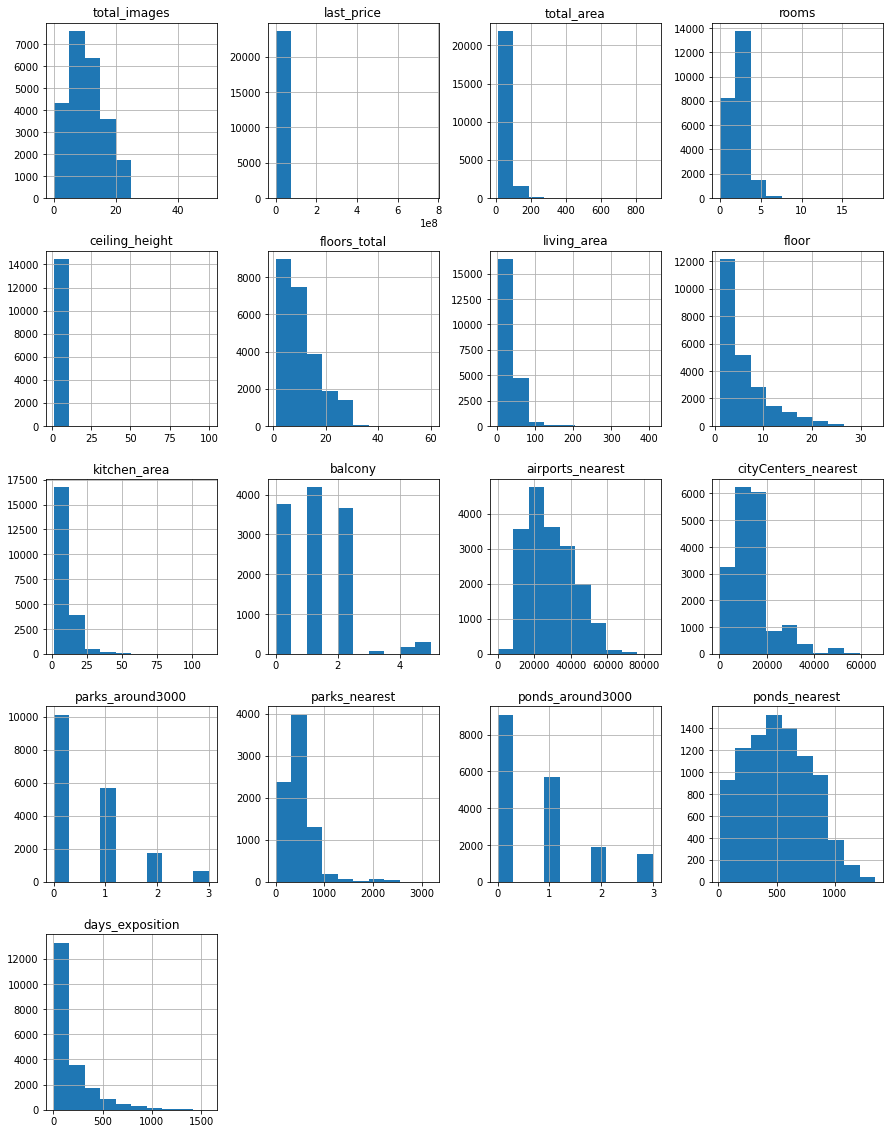

In [5]:
# строю гистограммы для всех числовых столбцов таблицы
data.hist(figsize=(15, 20));

#### Промежуточные выводы:

- **total_images-** количество изображений (*пропусков нет*)
- **last_price-** последняя цена обЪекта (*пропусков нет*)
- **total_area-** общая площадь (*пропусков нет*)
- **first_day_exposition-** дата размещения (*пропусков нет*)
- **rooms-** количество комнат (*пропусков нет*)
- **ceiling_height-** высота потолков (*по данному столбцу больше трети пропусков, также есть ошибки, потолки по 1 и 100 метров*) 
- **floors_total-** общее количество этажей в доме (*пропусков мало, нет возможности понять, сколько этажей в доме, оставлю без изменений*)
- **living_area-** жилая площадь (*пропуски можно попробовать заменить медианными значениями в зависимости от общей площади квартиры*)
- **floor-** этаж (*пропусков нет*)
- **is_apartment-** апартаменты (*стоит поменять на булев тип данных, большинство значений пропущено, скорей всего пропуски стоят, так как это не апартаменты*)
- **studio-** студия (*булев тип, в столбце всё хорошо*)
- **open_plan-** открытая планировка (*тоже булев тип, тоже всё хорошо*)
- **kitchen_area-** площадь кухни (*пропуски можно попробовать заменить медианными значениями в зависимости от общей площади квартиры, если это не студия или открытая планировка, в студиях кухня входит в жилую площадь*)
- **balcony-** количество балконов (*почти половина значений пропущена, но эти данные не понадабятся в дальнейшем исследовании, пропуски можно заменить на 0 или оставить без изменений*)
- **locality_name-** населённый пункт (*пропусков очень мало, скорей всего лучше просто удалить строки*)
- **airports_nearest-** близость аэропорта
- **cityCenters_nearest-** близость центра города (*стоит привести название к общему стилю, можно попробовать заменить пропуски медианными значениями в зависимости от населённого пункта, но мне кажется, что это будет некорректно, нет возможности достать точную геопозицию объекта*)
- **parks_around3000-** количество парков в радиусе 3 км (*стоит привести название к общему стилю, тип данных поменять на целые числа*)
- **parks_nearest-** близость парков (*больше половины пропусков, можно оставить, для исследования столбец не требуется*)
- **ponds_around3000-** количество водоёмов в радиусе 3 км (*стоит привести название к общему стилю, тип данных поменять на целые числа*)
- **ponds_nearest-** близость водоёмов (*больше половины пропусков, можно оставить, для исследования столбец не требуется*)
- **days_exposition-** срок объявления на сайте (*пропусков больше 10%, нужно проанализировать столбец*)

### Предобработка данных

#### Работа с пропусками

In [6]:
# вывожу количество пропусков по столбцам
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# заменяю пропуски в balcony на нули
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

In [8]:
# в столбцах  floors_total и locality_name пропусков меньше 1%, удалю строки, где они встречаются, чтобы не тратить время на выяснение, на результат исследования это повлиять не должно
data = data.dropna(subset=['floors_total', 'locality_name'])
print(data['floors_total'].isna().sum(), data['locality_name'].isna().sum())

0 0


In [9]:
# в столбце is_apartment пропуски меняю на False
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

**Заполнение пропусков в `living_area` и `kitchen_area` медианными значениями в зависимости от общей площади**

In [10]:
# заменяю пропуски нулём в kitchen_area, если это студия или открытая планировка
data['kitchen_area'] = data['kitchen_area'].where((data['kitchen_area'] != 'NaN') & (data['studio'] != True), 0)
data['kitchen_area'] = data['kitchen_area'].where((data['kitchen_area'] != 'NaN') & (data['open_plan'] != True), 0)
data['kitchen_area'].isna().sum()

2009

Разделять на группы по площади будет слишком долго и сложно, ещё есть вероятность ошибок, например, сумма жилой и кухонной и жилой площади превысят общую, можно найти долю медианной жилой и медианной кухонной площади от медианной общей площади и перемножить эти коэфициенты на общие площади, где есть пропуски.  

In [11]:
kitchen_coefficient = data['kitchen_area'].median()/data['total_area'].median()
living_coefficient = data['living_area'].median()/data['total_area'].median()

data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_coefficient)
data['living_area'] = data['living_area'].fillna(data['total_area'] * living_coefficient)
print(data['kitchen_area'].isna().sum(), data['living_area'].isna().sum())

0 0


**Заполнение пропусков и изменение типа данных в `is_apartment`**

In [12]:
# меняю пропуски на False
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].isna().sum())
# меняю тип данных на булев
data['is_apartment'] = data['is_apartment'].astype('bool')

0


In [13]:
data['last_price'] = data['last_price'].astype('int')

**Заполнение пропусков и работа с аномальными значениями в `ceiling_height`**

In [14]:
# Посчитаю число квартир с аномально высокими и аномально низкими потолками
print(len(data.query('ceiling_height > 10')), len(data.query('ceiling_height < 2')))

25 3


Аномальных значений не так много, можно заменить всё медианными значениями

In [15]:
# Заменяю аномальные значения и пропуски медианными значениями
for x in data['ceiling_height'].unique():
    data.loc[(data['ceiling_height'] == x) & (data['ceiling_height'] > 10) | (data['ceiling_height'] < 2) | (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data['ceiling_height'].median()

In [16]:
print(len(data.query('ceiling_height > 10')), len(data.query('ceiling_height < 2')), data['ceiling_height'].isna().sum())

0 0 0


#### Работа с дубликатами

In [17]:
# Начну с рассмотрения дубликатов в столбце locality_name
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

В глаза бросается сразу разноё написание слова "посёлок" и разное написание у некоторых населённых пунктов. Исправлю всё по порядку.

In [18]:
# приведу слово "посёлок" к одному виду
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')
# меняю "городской посёлок" на "посёлок городского типа"
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок городского типа')

In [19]:
# привожу разные написания одних и тех же населённых пунктов к единому виду, остальные схожие названия являются разными населёнными пунктами
data = data.replace({'locality_name':{'посёлок Мурино': 'Мурино', 'деревня Кудрово': 'Кудрово', 'посёлок Рябово':'посёлок городского типа Рябово'}})

In [20]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

Дальше рассмотрю явные дубликаты

In [21]:
data.duplicated().sum()

0

Явных дубликатов нет

#### Приведение названий столбцов к общему стилю

In [22]:
# приведение к змеиному регистру
data = data.rename(columns = {'parks_around3000':'parks_around_3000', 'ponds_around3000':'ponds_around_3000', 'cityCenters_nearest':'city_centers_nearest'})

In [23]:
# меняю тип данных в столбце first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

#### Аномалии

In [24]:
# В Петербурге и области нет жилых зданий выше 37 этажей
data.loc[data['floors_total']>37]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2253,12,3800000,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,...,7.4,0.0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000,40.0,2018-09-24,1,2.65,52.0,10.5,18,False,...,14.0,0.0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


In [25]:
# Удаляю данные строки строки
data = data.loc[data['floors_total']<37]

In [26]:
# В Петербурге самая удалённая от центра города точка находится примерно в 56км в Курортном районе
data.loc[data['city_centers_nearest']>56000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
577,7,4000000,59.0,2017-07-23,3,2.50,5.0,37.0,1,False,...,7.0,0.0,посёлок Молодёжное,84665.0,65764.0,0.0,NaN,0.0,NaN,NaN
939,17,3015000,31.2,2019-04-16,1,2.50,3.0,17.5,1,False,...,5.8,0.0,Зеленогорск,75646.0,56745.0,0.0,NaN,1.0,347.0,NaN
2974,13,3200000,46.3,2018-03-31,2,2.50,3.0,29.2,2,False,...,7.0,1.0,Зеленогорск,81355.0,62454.0,0.0,NaN,0.0,NaN,205.0
4441,6,2300000,31.0,2016-05-26,1,2.65,3.0,12.0,1,False,...,9.0,0.0,Зеленогорск,78527.0,59626.0,0.0,NaN,0.0,NaN,232.0
5218,15,3650000,53.8,2018-09-24,3,2.50,4.0,36.9,3,False,...,5.2,0.0,посёлок Молодёжное,83758.0,64857.0,0.0,NaN,0.0,NaN,121.0
5340,19,3600000,50.6,2019-03-19,2,2.50,5.0,29.9,4,False,...,7.0,1.0,посёлок Молодёжное,84853.0,65952.0,0.0,NaN,0.0,NaN,NaN
9640,8,4200000,51.4,2014-12-10,2,2.55,5.0,31.0,2,False,...,6.0,1.0,посёлок Молодёжное,84869.0,65968.0,0.0,NaN,0.0,NaN,1194.0
11244,8,4250000,32.0,2018-02-04,1,2.65,2.0,20.0,2,False,...,7.0,0.0,Зеленогорск,72713.0,59052.0,3.0,148.0,1.0,671.0,24.0
16569,13,3200000,52.8,2017-06-20,2,2.55,5.0,29.9,3,False,...,8.3,0.0,Ломоносов,53042.0,61495.0,2.0,223.0,0.0,NaN,240.0
18884,15,3600000,57.6,2019-02-08,3,2.55,3.0,41.3,2,False,...,6.5,1.0,Зеленогорск,81607.0,62706.0,0.0,NaN,0.0,NaN,13.0


In [27]:
# Удаляю строки, где расстояние до центра больше 56км
data = data.loc[data['city_centers_nearest']<56000]

**Вывод по предобработке данных**
В ходе предобработки данных была проведена работа с пропусками, часть строк с пропусками была удалена, некоторые пропуски были замены медианными значениями, также был изменён тип данных в некоторых столбцах, были обработаны дубликаты и обработаны аномалии. По итогу предобработки можно сказать, что было удалено меньше одного процента строк.

### Посчитайте и добавьте в таблицу новые столбцы

Расчитаю цену 1 квадратного метра в столбце price_per_square_meter

In [28]:
data['price_per_square_meter'] = data['last_price']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,91.730769,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


Добавляю столбцы с днём, месяцем и годом публикации объявления

In [29]:
# Добавляю столбец с днём недели
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
# Добавляю столбец c месяцем
data['month_exposition'] = data['first_day_exposition'].dt.month
# Добавляю столбец c годом
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,91.730769,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


Добавляю столбец с типом этажа

In [30]:
def floor_type_func(x):
    floor = x['floor']
    floors_total = x['floors_total']
    if floor == floors_total:
        return 'последний'
    elif floor == 1:
        return 'первый'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type_func, axis = 1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,91.730769,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой


Добавляю столбец с округлённм растоянием до центра города в километрах

In [31]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000, 0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,91.730769,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

#### Изучение параметров

##### Общая площадь

<AxesSubplot:>

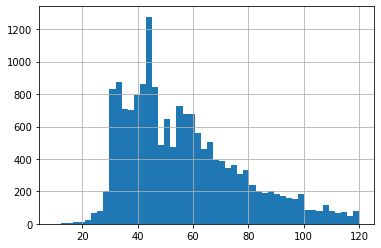

In [32]:
# Построю гистограмму для данного параметра
data['total_area'].hist(bins = 50, range = (10, 120))

Я не стал включать площади больше 120, так как они крайне редко встречаются. По гистограмме можно сказать, что чаще других встречаются квартиры с площадью между 40 и 50 $м^2$, площади больше встречаются реже, хоть медиана равна 52 $м^2$, а среднее 60 $м^2$. Гистограмма растянутая с высокой частотой у стандартных и маленьких квартир и низкой частотой у крупных.

##### Жилая площадь

<AxesSubplot:>

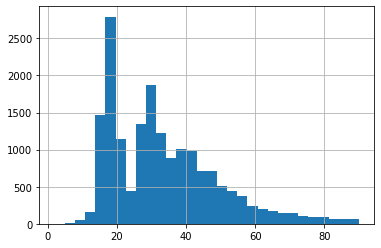

In [33]:
# Построю гистограмму для данного параметра
data['living_area'].hist(bins = 30,  range = (2, 90))

С жилой площадью складывается аналогичная ситуация, так как параметры взаимосвязаны. Я не стал включать площади больше 90, так как они крайне редко встречаются. По гистограмме можно сказать, что чаще других встречаются квартиры с жилой площадью между 15 и 20 $м^2$, площади больше встречаются реже, медиана равна 30 $м^2$, а среднее 34 $м^2$. Гистограмма также растянутая с высокой частотой у стандартных и маленьких квартир и низкой частотой у крупных.

##### Площадь кухни

<AxesSubplot:>

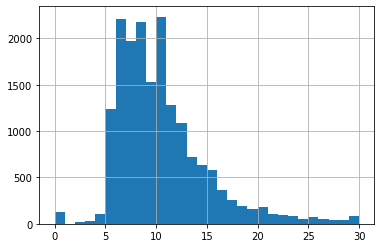

In [34]:
# Построю гистограмму для данного параметра
data['kitchen_area'].hist(bins = 30,  range = (0, 30))

Аналогичная ситуация. Площади больше не включены 30 $м^2$, так как они крайне редко встречаются. По гистограмме можно сказать, что чаще других встречаются квартиры с площадью кухни между 5 и 10 $м^2$, площади больше встречаются реже, медиана равна 9 $м^2$, а среднее 10 $м^2$. Гистограмма также растянутая с высокой частотой у стандартных и маленьких квартир и низкой частотой у крупных.

##### Цена объекта

<AxesSubplot:>

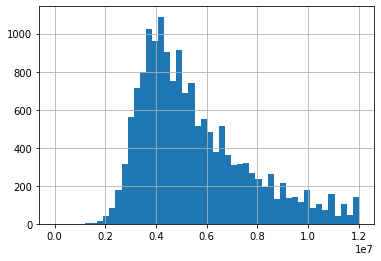

In [35]:
min_price = data['last_price'].min()
max_price = data['last_price'].max()
# Построю гистограмму для данного параметра
data['last_price'].hist(bins = 50, range = (0, 12000000))

По графику видно, что чаще всего недвижимость продаётся за 3 - 5 млн. Медиана равна 4,65 млн., а среднее 6,54 млн.

##### Количество комнат

<AxesSubplot:>

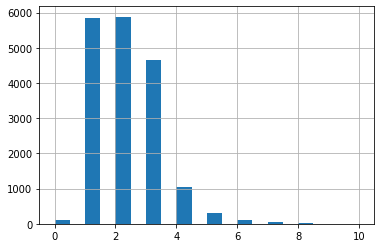

In [36]:
# Построю гистограмму для данного параметра
data['rooms'].hist(bins = 20, range = (0, 10))

Чаще всего продаются квартиры с 1, 2 и 3 комнатами, остальные совсем редко. Медиана и среднее равны двум.

##### Высота потолков

<AxesSubplot:>

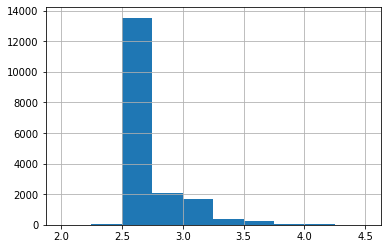

In [37]:
# Построю гистограмму для данного параметра
data['ceiling_height'].hist(bins = 10, range = (2, 4.5))

Высота потолков в основном от 2,5 до 2,7 метров, выше или ниже редко. Среднее 2,77, медиана 2,65

##### Этаж квартиры

<AxesSubplot:>

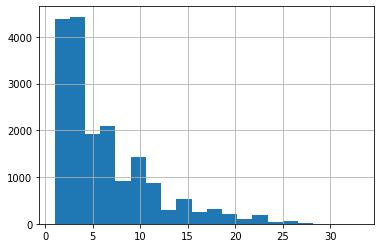

In [38]:
# Построю гистограмму для данного параметра
data['floor'].hist(bins = 20)

Чаще других встречаются квартиры до 5 этажа, среднее равно 5,8, а медиана 4.

##### Тип этажа квартиры

<AxesSubplot:xlabel='floor_type'>

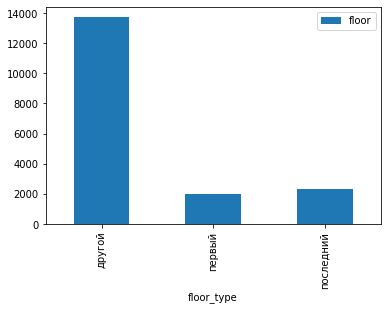

In [39]:
data.pivot_table(index = 'floor_type', values = 'floor', aggfunc = 'count').plot(kind = 'bar')

Квартиры на первом и последнем этажах встречаются реже остальных.

##### Общее количество этажей в доме

<AxesSubplot:>

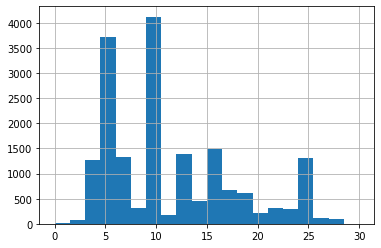

In [40]:
# Построю гистограмму для данного параметра
data['floors_total'].hist(bins = 20, range = (0, 30))

По графику видно, что в Петербурге и области много домов с пятью и десятью этажами. Среднее равно 10.67, а медиана 9.

##### Расстояние до центра города в метрах

<AxesSubplot:>

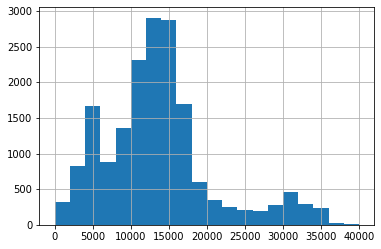

In [41]:
# Построю гистограмму для данного параметра
data['city_centers_nearest'].hist(bins = 20, range = (0, 40000))

Чаще всего встречаются квартиры на растоянии 10-15 км от центра. Среднее равно 14 км, а медиана 13 км.

##### Расстояние до ближайшего аэропорта

<AxesSubplot:>

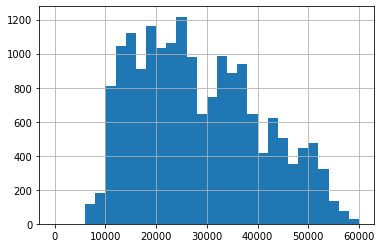

In [42]:
# Построю гистограмму для данного параметра
data['airports_nearest'].hist(bins = 30, range = (0, 60000))

Квартиры на расстоянии 10-25 км от аэропорта встречаются чаще. Среднее равно 28.8 км, а медиана 26.7 км.

##### Расстояние до ближайшего парка

<AxesSubplot:>

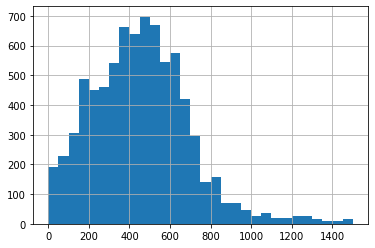

In [43]:
# Построю гистограмму для данного параметра
data['parks_nearest'].hist(bins = 30, range = (0, 1500))

На графике видно, что чаще всего квартиры располагаются в 500 м от парков, среднее равно 490, а медиана 455.

##### День и месяц публикации

<AxesSubplot:>

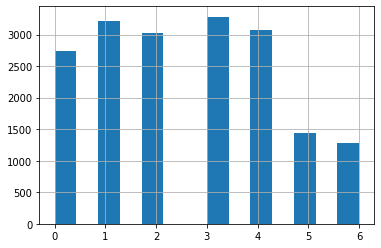

In [44]:
# строю гистограмму для дня публикации
data['weekday_exposition'].hist(bins = 14)

<AxesSubplot:>

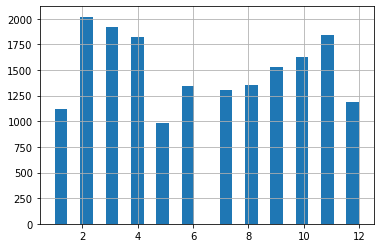

In [45]:
# строю гистограмму для месяца публикации
data['month_exposition'].hist(bins = 24)

По данным гистограммам можно сделать следующие выводы:
- объявления по выходным публикуют заметно реже, чем в будни
- самый популярный день публикации объявления- четверг
- самый непопулярный день публикации объявления- воскресенье
- перед большими праздниками наблюдается снижение числа публикаций, видно, как до декабря частота объявлений растёт, а потом падает, также видно, что после январских частота публикаций высокая, а в мае резко падает

#### Как быстро продавались квартиры

<AxesSubplot:>

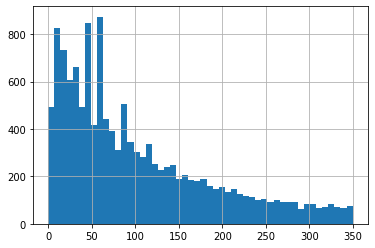

In [46]:
# Строю гистограмму для параметра days_exposition
data['days_exposition'].hist(bins = 50, range = (0, 350))

На графике видны пики у ~45 и ~60 дней. Среднее равно 181 день, а медиана 95 дней. Можно заметить, что большая часть объектов продаётся меньше, чем за полгода.

In [47]:
data['days_exposition'].describe()

count    15745.000000
mean       182.313623
std        223.240813
min          1.000000
25%         43.000000
50%         96.000000
75%        232.000000
max       1572.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

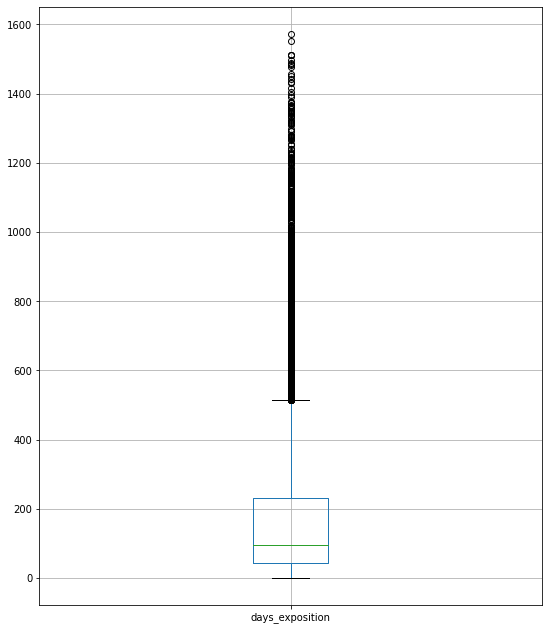

In [48]:
# Построю диаграмму размаха
data.boxplot(column = 'days_exposition', figsize=(9,11))

Судя по графику и описанию данных можно сказать следующее:
- быстрые продажи до 43 дней(первый квартиль)
- нормальная скорость продажи от 43 до 232 дней(межквартильный размах)
- долгие продажи между 232 и 500 днями(от 3 квартиля до конца уса)
- аномально долгие продажи более 500 дней(то что отсечено верхним усом)

#### Факторы, влияющие на стоимость

In [49]:
# Построю корреляционную матрицу
parametrs = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'weekday_exposition', 'month_exposition', 'year_exposition', 'floor_type']
data[parametrs].corr().style.background_gradient(cmap='coolwarm')

,last_price,total_area,living_area,kitchen_area,rooms,weekday_exposition,month_exposition,year_exposition
last_price,1.000000,0.652089,0.587127,0.508584,0.370419,0.004555,0.001514,-0.042263
total_area,0.652089,1.000000,0.947744,0.661725,0.759867,-0.003606,0.003258,-0.085043
living_area,0.587127,0.947744,1.000000,0.510371,0.826446,-0.003541,-0.002861,-0.075062
kitchen_area,0.508584,0.661725,0.510371,1.000000,0.347899,-0.005168,-0.002971,-0.067225
rooms,0.370419,0.759867,0.826446,0.347899,1.000000,-0.007543,-0.002977,-0.058644
weekday_exposition,0.004555,-0.003606,-0.003541,-0.005168,-0.007543,1.000000,0.007648,-0.003031
month_exposition,0.001514,0.003258,-0.002861,-0.002971,-0.002977,0.007648,1.000000,-0.274225
year_exposition,-0.042263,-0.085043,-0.075062,-0.067225,-0.058644,-0.003031,-0.274225,1.000000


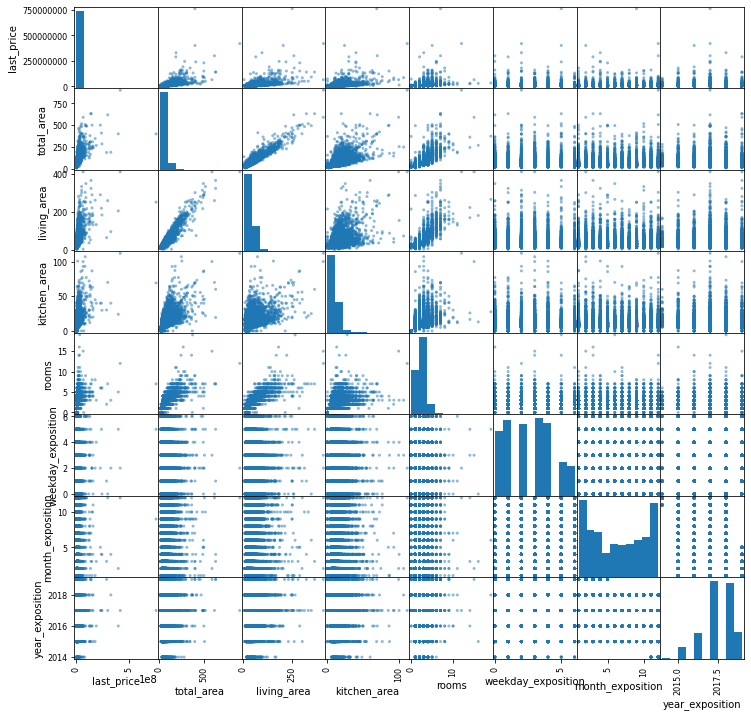

In [50]:
pd.plotting.scatter_matrix(data[parametrs], figsize=(12, 12)); 

По корреляционной матрице сразу видно, что стоимотсь больше всего влияют характеристики площади. У остальных характеристик коэффициент корреляции слишком низкий, чтобы оказывать влияние. Также можно отметить, что характеристика типа этажа не вошла в матрицу, так как это не числовая характеристика.

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

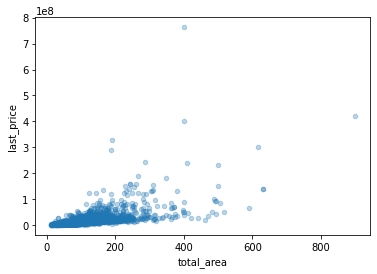

In [51]:
# Построю диаграмму рассеяния для total_area
data.plot(x = 'total_area', y = 'last_price', kind = 'scatter', alpha = 0.3)

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

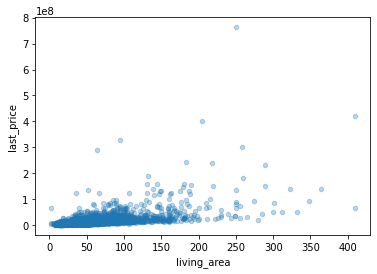

In [52]:
# Построю диаграмму рассеяния для living_area
data.plot(x = 'living_area', y = 'last_price', kind = 'scatter', alpha = 0.3)

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

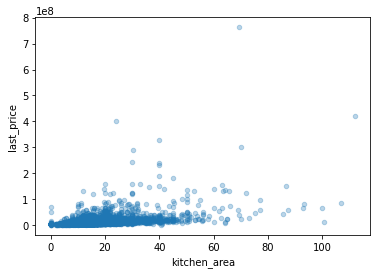

In [53]:
# Построю диаграмму рассеяния для living_area
data.plot(x = 'kitchen_area', y = 'last_price', kind = 'scatter', alpha = 0.3)

Cвязь между параметрами площади и стоимостью есть, но она не абсолютная. Есть ещё множество других, которые влияют на стоимость не меньше, чем площадь, это может быть наличие хорошего ремонта, мебели и техники, качество инфраструктуры вокруг и т.п.

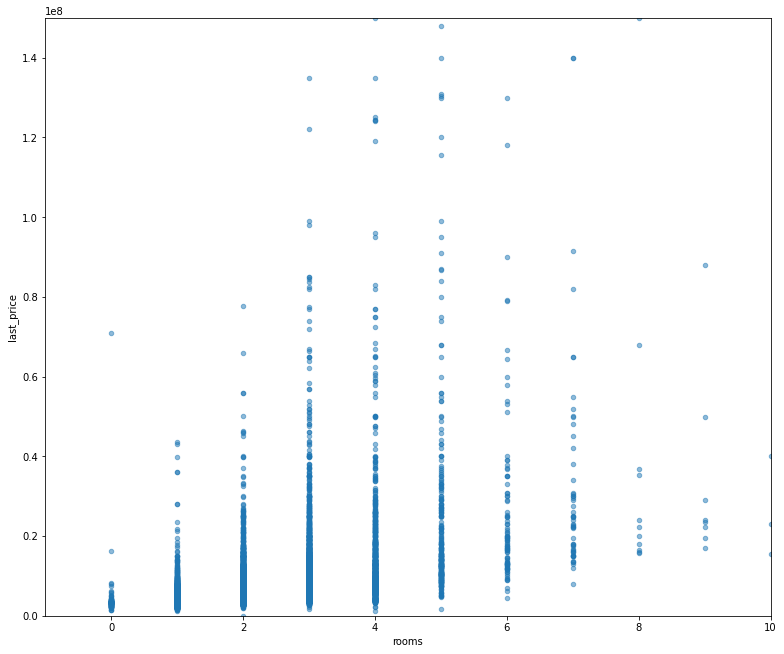

In [54]:
# Построю диаграмму рассеяния для rooms
data.plot(x = 'rooms', y = 'last_price', kind = 'scatter', alpha = 0.5, figsize = (13, 11))
plt.xlim(-1, 10)
plt.ylim(0, 150000000)
plt.show()

По графику видно, что связь есть, у квартир с большим числом комнат наблюдаются более высокие цены, также можно отметить, что большинство квартир вне зависимости от числа комнат стоят до 40млн.

<AxesSubplot:xlabel='floor_type'>

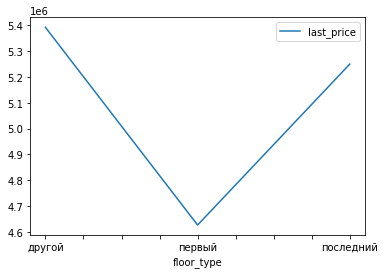

In [55]:
# Построю график по медианным значениям для floor_type
data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median').plot()

По графику можно сказать, что обычно квартиры на первом этаже самые дешёвые, самые дорогие квартиры находятся между первым и последним этажами, а на последнем этаже квартиры немного дешевле.

<AxesSubplot:xlabel='weekday_exposition', ylabel='last_price'>

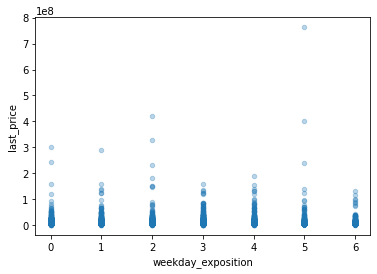

In [56]:
# Построю диаграмму рассеяния для weekday_exposition
data.plot(x = 'weekday_exposition', y = 'last_price', kind = 'scatter', alpha = 0.3)

<AxesSubplot:xlabel='month_exposition', ylabel='last_price'>

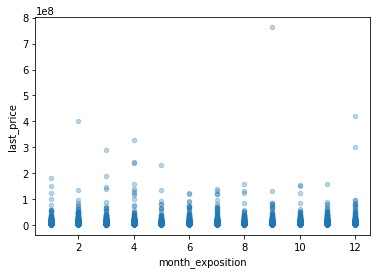

In [57]:
# Построю диаграмму рассеяния для month_exposition
data.plot(x = 'month_exposition', y = 'last_price', kind = 'scatter', alpha = 0.3)

<AxesSubplot:xlabel='year_exposition', ylabel='last_price'>

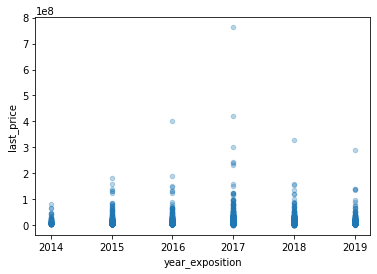

In [58]:
# Построю диаграмму рассеяния для year_exposition
data.plot(x = 'year_exposition', y = 'last_price', kind = 'scatter', alpha = 0.3)

Зависимости между днём недели, месяцем и годом публикации не наблюдается. 

**Вывод:**
Из тех параметров, что у нас есть, сильнее всего на стоимость квартиры влияют параметры площади- чем больше площадь, тем выше стоимость. Также на стоимость заметно влияют тип этажа и количество комнат.

#### Средняя стоимость квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [59]:
# определяю эти десять населённых пунктов
large_towns = data['locality_name'].value_counts().index[:10]
large_towns

Index(['Санкт-Петербург', 'посёлок Шушары', 'Пушкин', 'Колпино',
       'посёлок Парголово', 'Петергоф', 'Сестрорецк', 'Красное Село',
       'Ломоносов', 'Кронштадт'],
      dtype='object')

In [60]:
# считаю стоимость квадратного метра в данных населённых пунктах
data.query('locality_name in @large_towns').pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc = 'mean').sort_values(by = 'price_per_square_meter', ascending = False)

,price_per_square_meter
locality_name,
Санкт-Петербург,114709.943106
Пушкин,103070.374746
Сестрорецк,101757.616875
посёлок Парголово,90175.913458
Петергоф,84757.559690
Кронштадт,79336.164687
посёлок Шушары,78474.361643
Колпино,75402.500198
Ломоносов,72827.979061


In [61]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15589,5500000
посёлок Шушары,436,3950000
Пушкин,368,5165000
Колпино,337,3600000
посёлок Парголово,327,4100000
Петергоф,201,3790000
Сестрорецк,183,5450000
Красное Село,174,3390000
Ломоносов,130,3485000


Ожидаемо, что среди самых крупных населённых пунктов в Санкт-Петербурге стоимость квадратного метра самая высокая. Выборге стоимость ниже всего, это может быть связано с тем, что из данного списка он находится дальше всего от Санкт-Петербурга, остальные населённые пункты довольно близки к административному центру.

#### Влияние близости к центру города на стоимость в Санкт-Петербурге

In [62]:
# Достаю строки с Санкт-Петербургом
spb = data[data['locality_name'] == 'Санкт-Петербург']
spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,91.730769,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,41.307692,22,False,...,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000,35.30,2018-02-28,1,2.86,15.0,16.300000,4,False,...,353.0,2.0,652.0,29.0,100566.572238,2,2,2018,другой,16.0
23690,3,5500000,52.00,2018-07-19,2,2.65,5.0,31.000000,2,False,...,300.0,0.0,NaN,15.0,105769.230769,3,7,2018,другой,6.0
23691,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.300000,7,False,...,NaN,1.0,806.0,519.0,129903.978052,3,10,2016,другой,4.0
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,796.0,3.0,381.0,NaN,72490.845228,1,3,2017,другой,4.0


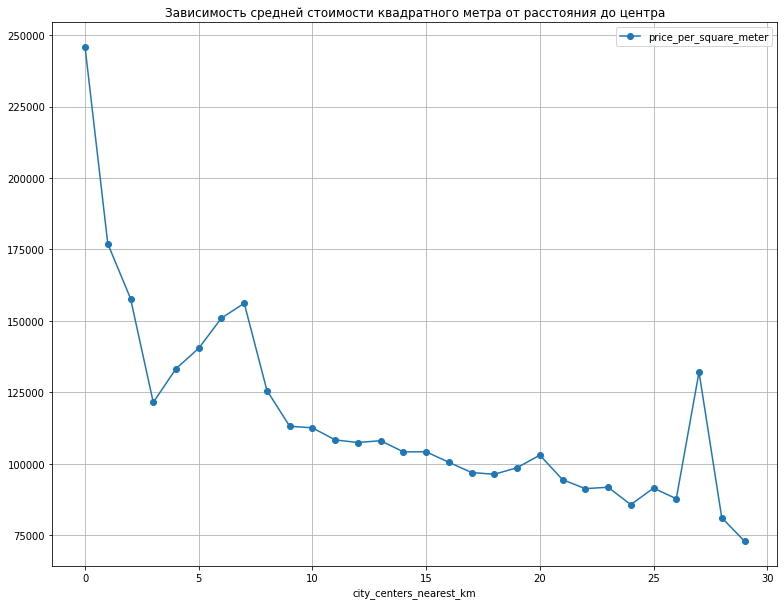

In [63]:
# Рассчитаю среднюю стоимость квадратного метра в зависимости от расстояния до центра города и построю таблицу для наглядности
spb.pivot_table(index = 'city_centers_nearest_km', values = 'price_per_square_meter', aggfunc = 'mean')\
    .plot(marker = 'o', grid = True, figsize = (13, 10), title = 'Зависимость средней стоимости квадратного метра от расстояния до центра');

В радиусе примерно пяти киллометров от центра находятся самые дорогие районы Санкт-Петербурга(Центральный, Адмиралтейский, Петроградский и Василеостровский), что и видно по графику. Также на графике виден выброс на расстоянии чуть больше 25 км, на этом расстоянии находятся Пушкин, Петергоф и Сестрорецк, где недвижимость достаточно дорогоя. 

### Общий вывод

Задачей данного проекта было выполнение предобработки данных и их изучение для поиска интересных закономерностей и зависимостей, существующих на рынке недвижимости.

В ходе предобработки данных были заполнены пропуски, изменён тип данных в некоторых столбцах, обработаны неявные дубликаты в названиях населённых пунктов, а также названия столбцов приведены к змеинному регистру.
При изучении данных было выяснено следующее:
- чаще других встречаются квартиры с общей площадью между 40 и 50 $м^2$, жилой площадью между 15 и 20 $м^2$ и площадью кухни между 5 и 10 $м^2$
- чаще всего недвижимость продаётся за 3 - 5 млн
- в осномном продаются квартиры с 1, 2 и 3 комнатами
- большиство квартир продаются меньше, чем за полгода, а чаще всего за 45 и 60 дней
- больше всего на стоимость квартиры влияет площадь
- также на стоимость влияет близость к центру и/или район
- из десяти населённых пунктов с наибольшим количеством объявлений самый дорогой квадратный метр в Санкт-Петербурге(~115тыс.), а самый дешёвых в Выборге(58тыс.) 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод